# Predicting Gender and Age using Convolutional Neural Network


*   id = picture id
*   sex = sex of person in picture 1 = male, 0 = female
*   age = age of person in picture



In [1]:
import shutil
shutil.unpack_archive('Python_Project_Data.zip')

import pandas as pd
import numpy as np

df = pd.read_csv('Python_Project_Data.csv')

pixels= []
for p in df.pixels:
  pixels.append(np.fromstring(p,sep=' '))
df['pixels'] = pixels

#pixels = None


In [2]:
#split training data and testing data, sex = 1, male, sex = 0, female
df_predict = df[pd.isnull(df.age) == True].copy()
df = df[pd.isnull(df.age) == False].copy()

print(df_predict)
print(df)

         id  age  sex                                             pixels
8500   8501  NaN  NaN  [134.0, 143.0, 149.0, 150.0, 105.0, 19.0, 11.0...
8501   8502  NaN  NaN  [2.0, 6.0, 85.0, 133.0, 58.0, 54.0, 68.0, 112....
8502   8503  NaN  NaN  [52.0, 64.0, 73.0, 75.0, 100.0, 116.0, 131.0, ...
8503   8504  NaN  NaN  [81.0, 8.0, 17.0, 22.0, 21.0, 20.0, 18.0, 13.0...
8504   8505  NaN  NaN  [246.0, 247.0, 249.0, 244.0, 238.0, 143.0, 86....
...     ...  ...  ...                                                ...
9995   9996  NaN  NaN  [249.0, 87.0, 36.0, 42.0, 48.0, 61.0, 73.0, 81...
9996   9997  NaN  NaN  [94.0, 94.0, 99.0, 104.0, 102.0, 99.0, 105.0, ...
9997   9998  NaN  NaN  [51.0, 18.0, 24.0, 26.0, 38.0, 28.0, 31.0, 34....
9998   9999  NaN  NaN  [120.0, 110.0, 86.0, 105.0, 106.0, 142.0, 157....
9999  10000  NaN  NaN  [145.0, 99.0, 36.0, 59.0, 10.0, 49.0, 45.0, 67...

[1500 rows x 4 columns]
        id   age  sex                                             pixels
0        1  47.0  1.0  [21

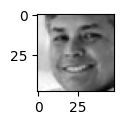

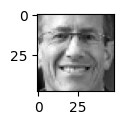

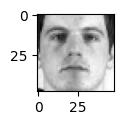

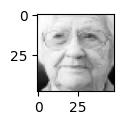

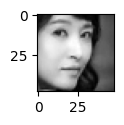

In [11]:
#first 5 images of training data
for i in range(5):
  plt.figure(figsize=(1,1))
  plt.imshow(pixels[i], cmap='gray')

In [3]:

#reshape pixels
pixels = df.pixels.tolist()
pixels = np.expand_dims(pixels, axis=2)
pixels.shape
pixels = np.reshape(pixels,(8500,48,48))

pixels.shape

pixels = np.expand_dims(pixels, axis=3)

pixels.shape



(8500, 48, 48, 1)

In [4]:

#reshape pixels
ppixels = df_predict.pixels.tolist()
ppixels = np.expand_dims(ppixels, axis=2)
ppixels.shape
ppixels = np.reshape(ppixels,(1500,48,48))

ppixels.shape

ppixels = np.expand_dims(ppixels, axis=3)

ppixels.shape

(1500, 48, 48, 1)

In [5]:
#Normalize pixels
pixels = pixels /255
ppixels = ppixels /255


In [6]:
import numpy as np
import tensorflow
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential
from matplotlib import pyplot as plt

#define the number of filters, filter size, and max pooling window size to use in the convolution process
number_of_filters = 16
filter_size = 5 
max_pooling_window_size = 3 

#define the structure of the CNN model for predicting GENDER
cnn = Sequential() #this will be a sequential model (as opposed to a recurrent model)
cnn.add(Conv2D(number_of_filters, filter_size, input_shape=(48,48,1))) #add the convolution layer
cnn.add(MaxPooling2D(pool_size=max_pooling_window_size)) #add the max pooling layer
cnn.add(Flatten()) #add the flattening layer
#add the output layer
cnn.add(Dense(300, activation='relu'))
cnn.add(Dense(150, activation='relu'))
cnn.add(Dense(1, activation='sigmoid')) 

cnn.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])



In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 44, 44, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 300)               941100    
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 1)                 151       
                                                        

In [9]:
cnn.fit(pixels, df['sex'], epochs=100, batch_size=30, validation_split= 0.1)
print('Training complete!')

Epoch 1/100
255/255 [==============================] - 14s 6ms/step - loss: 0.4573 - accuracy: 0.7779 - val_loss: 0.3279 - val_accuracy: 0.8576
Epoch 2/100
255/255 [==============================] - 1s 4ms/step - loss: 0.3156 - accuracy: 0.8578 - val_loss: 0.3001 - val_accuracy: 0.8647
Epoch 3/100
255/255 [==============================] - 1s 4ms/step - loss: 0.2716 - accuracy: 0.8868 - val_loss: 0.2987 - val_accuracy: 0.8706
Epoch 4/100
255/255 [==============================] - 1s 4ms/step - loss: 0.2380 - accuracy: 0.8974 - val_loss: 0.2691 - val_accuracy: 0.8741
Epoch 5/100
255/255 [==============================] - 1s 4ms/step - loss: 0.1997 - accuracy: 0.9183 - val_loss: 0.3090 - val_accuracy: 0.8659
Epoch 6/100
255/255 [==============================] - 1s 4ms/step - loss: 0.1678 - accuracy: 0.9332 - val_loss: 0.3124 - val_accuracy: 0.8824
Epoch 7/100
255/255 [==============================] - 1s 4ms/step - loss: 0.1357 - accuracy: 0.9460 - val_loss: 0.3494 - val_accuracy: 0.877

In [18]:
#predicting gender for the 1500 data
predictions = np.array(cnn.predict(ppixels.tolist()))

df_predict['sex'] = np.round(predictions)

print(df_predict['sex'])


47/47 [==============================] - 0s 2ms/step
8500    1.0
8501    1.0
8502    0.0
8503    0.0
8504    1.0
       ... 
9995    0.0
9996    1.0
9997    0.0
9998    1.0
9999    0.0
Name: sex, Length: 1500, dtype: float32


In [15]:
#define the number of filters, filter size, and max pooling window size to use in the convolution process
number_of_filters = 16
filter_size = 5 
max_pooling_window_size = 3 

#define the structure of the CNN model for predicting AGE
model = Sequential() #this will be a sequential model (as opposed to a recurrent model)
model.add(Conv2D(number_of_filters, filter_size, input_shape=(48,48,1))) #add the convolution layer
model.add(MaxPooling2D(pool_size=max_pooling_window_size)) #add the max pooling layer
model.add(Flatten()) #add the flattening layer
#add the output layer
model.add(Dense(300, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(1, activation='linear')) #ACTIVATION = linear for age (continuous variable) 

model.compile('adam', loss='mean_squared_error', metrics=['mean_absolute_error'])



In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 44, 44, 16)        416       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dense_9 (Dense)             (None, 300)               941100    
                                                                 
 dense_10 (Dense)            (None, 150)               45150     
                                                                 
 dense_11 (Dense)            (None, 1)                 151       
                                                      

In [17]:
model.fit(pixels, df['age'], epochs=100, batch_size=30, validation_split= 0.1)
print('Training complete!')

Epoch 1/100
255/255 [==============================] - 2s 4ms/step - loss: 399.5749 - mean_absolute_error: 15.2217 - val_loss: 253.4698 - val_mean_absolute_error: 12.3730
Epoch 2/100
255/255 [==============================] - 1s 4ms/step - loss: 248.7798 - mean_absolute_error: 12.1507 - val_loss: 218.0124 - val_mean_absolute_error: 10.9280
Epoch 3/100
255/255 [==============================] - 1s 3ms/step - loss: 213.1084 - mean_absolute_error: 11.0736 - val_loss: 203.7302 - val_mean_absolute_error: 10.9928
Epoch 4/100
255/255 [==============================] - 1s 3ms/step - loss: 189.7875 - mean_absolute_error: 10.3150 - val_loss: 193.5617 - val_mean_absolute_error: 10.7735
Epoch 5/100
255/255 [==============================] - 1s 4ms/step - loss: 171.0767 - mean_absolute_error: 9.7049 - val_loss: 160.8402 - val_mean_absolute_error: 9.3478
Epoch 6/100
255/255 [==============================] - 1s 4ms/step - loss: 152.5328 - mean_absolute_error: 9.0871 - val_loss: 153.0258 - val_mean_a

In [19]:
#predicting age for the 1500 data
predictions = np.array(model.predict(ppixels.tolist()))

df_predict['age'] = np.round(predictions)

print(df_predict['age'])


47/47 [==============================] - 0s 2ms/step
8500    20.0
8501    24.0
8502    33.0
8503    28.0
8504    23.0
        ... 
9995     6.0
9996    38.0
9997    40.0
9998    25.0
9999    22.0
Name: age, Length: 1500, dtype: float32


In [20]:
#turn negative values into 0s

df_predict[df_predict['age']<0]=0

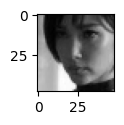

Gender prediction: 1.0  Age prediction:  20.0


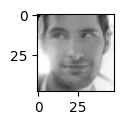

Gender prediction: 1.0  Age prediction:  24.0


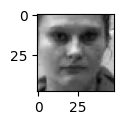

Gender prediction: 0.0  Age prediction:  33.0


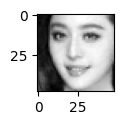

Gender prediction: 0.0  Age prediction:  28.0


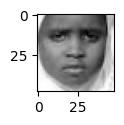

Gender prediction: 1.0  Age prediction:  23.0


In [43]:
#Results for first 5 testing images
for i in range(5):
  plt.figure(figsize=(1,1))
  plt.imshow(ppixels[i], cmap='gray')
  plt.show()
  print('Gender prediction:', df_predict['sex'].tolist()[i], ' Age prediction: ', df_predict['age'].tolist()[i])
 

In [25]:
#calculate and display the accuracy of the CNN's predictions on the training data for GENDER
loss, accuracy = cnn.evaluate(pixels, df['sex'])
print('Training Accuracy: {:.2%}'.format(accuracy))

#calculate and display the accuracy of the CNN's predictions on the testing data for GENDER
loss, accuracy = cnn.evaluate(ppixels, df_predict['sex'])
print('Testing Accuracy: {:.2%}'.format(accuracy))

266/266 [==============================] - 1s 3ms/step - loss: 0.1266 - accuracy: 0.9876
Training Accuracy: 98.76%
47/47 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9993
Testing Accuracy: 99.93%


In [ ]:
#Convert results into CSV file
df_predict[['id', 'age', 'sex']].to_csv('Yu, Alicia.csv', index=False)